## STEP 1: Import the required files

- numpy: numpy is the core library for computing in python. It is used for working with arrays and matrices.
- pandas: used for data manipulation and analysis.
- matplotlib: it's plotting library, and we are going to use it for data visualization.
- seaborn: it is also data visualization library, based on matplotlib.
- linear_model: sklearn linear regression model.
- train_test_split: helper funtion from sklearn library for splitting the dataset.
- sklearn.metrics: library encapsulate function to measure the model performance.
- polynomialFeatures: this used to generate polynomial features. in this study we are going to generate second degree features.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')

## STEP 2: Load the data

In [2]:
df = pd.read_csv(r"D:\Personal Project\DA_DE\Predict the weight of the fish\Fish (Practice).csv")

print('Dimension of dataset:', df.shape)
df.head(5) # head(n) return first n records only. can also use sample(n) for random n records.


Dimension of dataset: (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



# Step 3: Understand The Data
* There are total 159 rows(training samples) and 7 columns in dataset. 
* Each column details are as below 
 
| Column Name | Details
| ------------|--------------
| Species     | Species name of fish 
| Weight      | Weight of fish in gram     
| Length1     | Vertical length in CM
| Length2     | Diagonal length in CM
| Length3     | Cross length in CM
| Height      | Height in CM
| Width       | Diagonal width in CM   
 
* Features/input values/independent variables are 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
* Target/output value/dependent variable is 'Weight'
* So, we have to estimate the weight of the fish based on its measurement values.
 
Let's change the name of columns lenght1,length2 and length3  as per the content of it.

In [3]:
df1 = df.rename(columns = {'Length1':'VerticalLen', 'Length2':'DiagonalLen', 'Length3':'CrossLen'})
df1.sample(5)

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720
100,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## STEP 4: Data analysis cleaning and visualization

### Corelation check
- correlation helps us investigate and establish ralationships between variables
- not that high amount of corralation between independent varibles suggest that linear regression estimation will ve unreliable

In [5]:
df1.corr().style.background_gradient(cmap = 'Greens')

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation matrix')

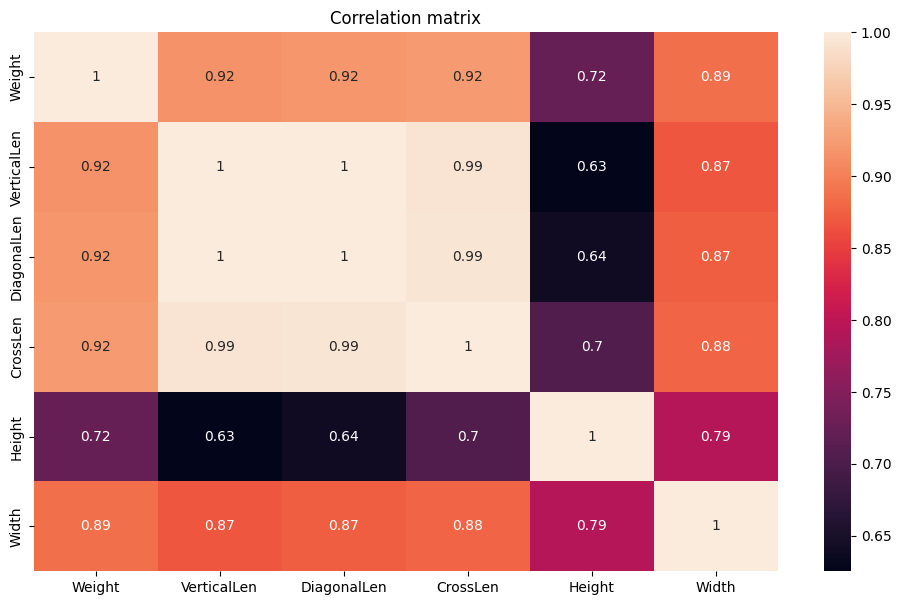

In [6]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.heatmap(df1.corr(), annot = True)
plt.title('Correlation matrix')

### Reading Correlation Matrix

- correlation coeffcient range from -1 to 1
- sign(+/-) indicate the direction and amount incate the strength of corrlation
- +1 means perfect positive relationship
- 0 means no relationship
- -1 means perfect negative ralationship
- the correlation between 'VerticaLen', 'DiagonalLen' and 'Crosslen' is almost 1. This may cause 'Multicolinearity'.

let's dropthe 'VerticalLen', 'DiagonalLen' and 'Crosslen', column

In [9]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis = 1)
print('New dimension of dataset is:', df2.shape)
df.head()

New dimension of dataset is: (159, 4)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Visualization using pairplot



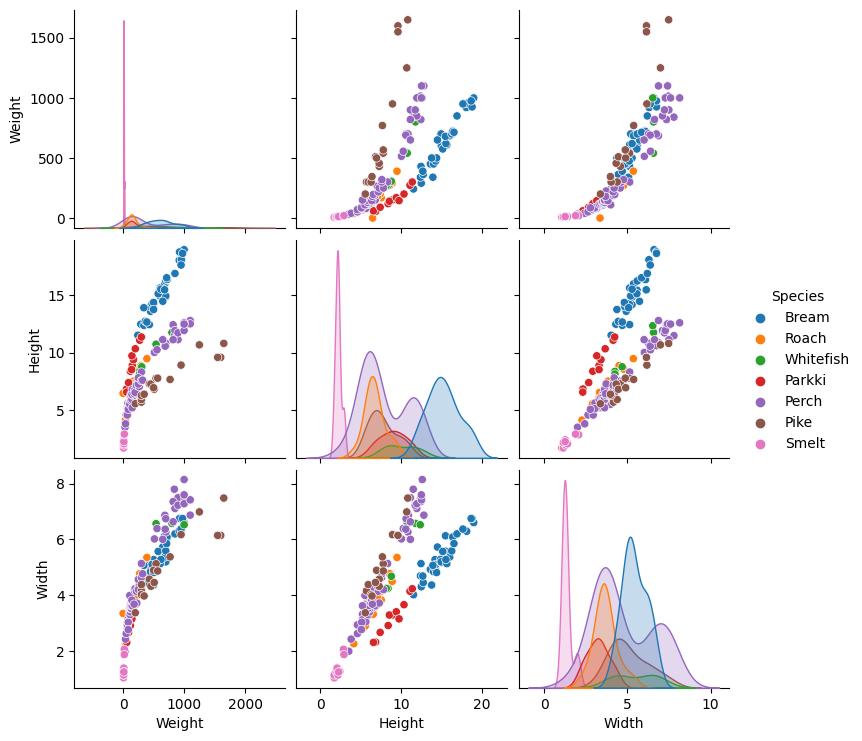

In [10]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

From the above pairplot, we can see that there seems to be some corrlelations between height, width and the weight. Note that since we have multiple the correlation between hight and width of all secies is not exactly linear with weight.

now, since we have the final dataset ready lets analyze and remove the outliers if any

### Outlier detection and removal

- outlier is an wxtremely high or wxtremely low value in our data
- we use below formula to identify the outlier

( greater than Q3 + 1.5